   
33102
idx: 1, prev_idx: 0
data[j]: 32848
diff: -3
data[j]: 32835
diff: -2
data[j]: 32905
diff: -5
data[j]: 32837
diff: -1
data[j]: 32835
diff: 0
data[j]: 32890
diff: -1
data[j]: 32838
diff: -2
data[j]: 32903
diff: -2
data[j]: 32836
diff: 0
data[j]: 32834
diff: 0
data[j]: 32845
diff: 0
data[j]: 32833
diff: 1
data[j]: 32900
diff: 0
data[j]: 32836
diff: 1
data[j]: 32835
diff: 1
data[j]: 32889
diff: 3
data[j]: 32836
diff: 0
data[j]: 32901
diff: -1
data[j]: 32836
diff: 2
data[j]: 32834
diff: 0
data[j]: 32845
diff: 3
data[j]: 32834
diff: 1
data[j]: 32900
diff: 0
data[j]: 32837
diff: 0
data[j]: 32836
diff: -2
data[j]: 32892
diff: -5
data[j]: 32836
diff: -2
data[j]: 32900
diff: -1
data[j]: 32838
diff: -1
data[j]: 32834
diff: 1
data[j]: 32848
diff: 168
data[j]: 32835
diff: 144
data[j]: 32900
diff: 89
data[j]: 32837
diff: 87
data[j]: 32834
diff: 25
data[j]: 32887
diff: 118
data[j]: 32834
diff: 111
data[j]: 32899
diff: 75
data[j]: 32837
diff: 73
data[j]: 32835
diff: 22
data[j]: 33016
diff: -7

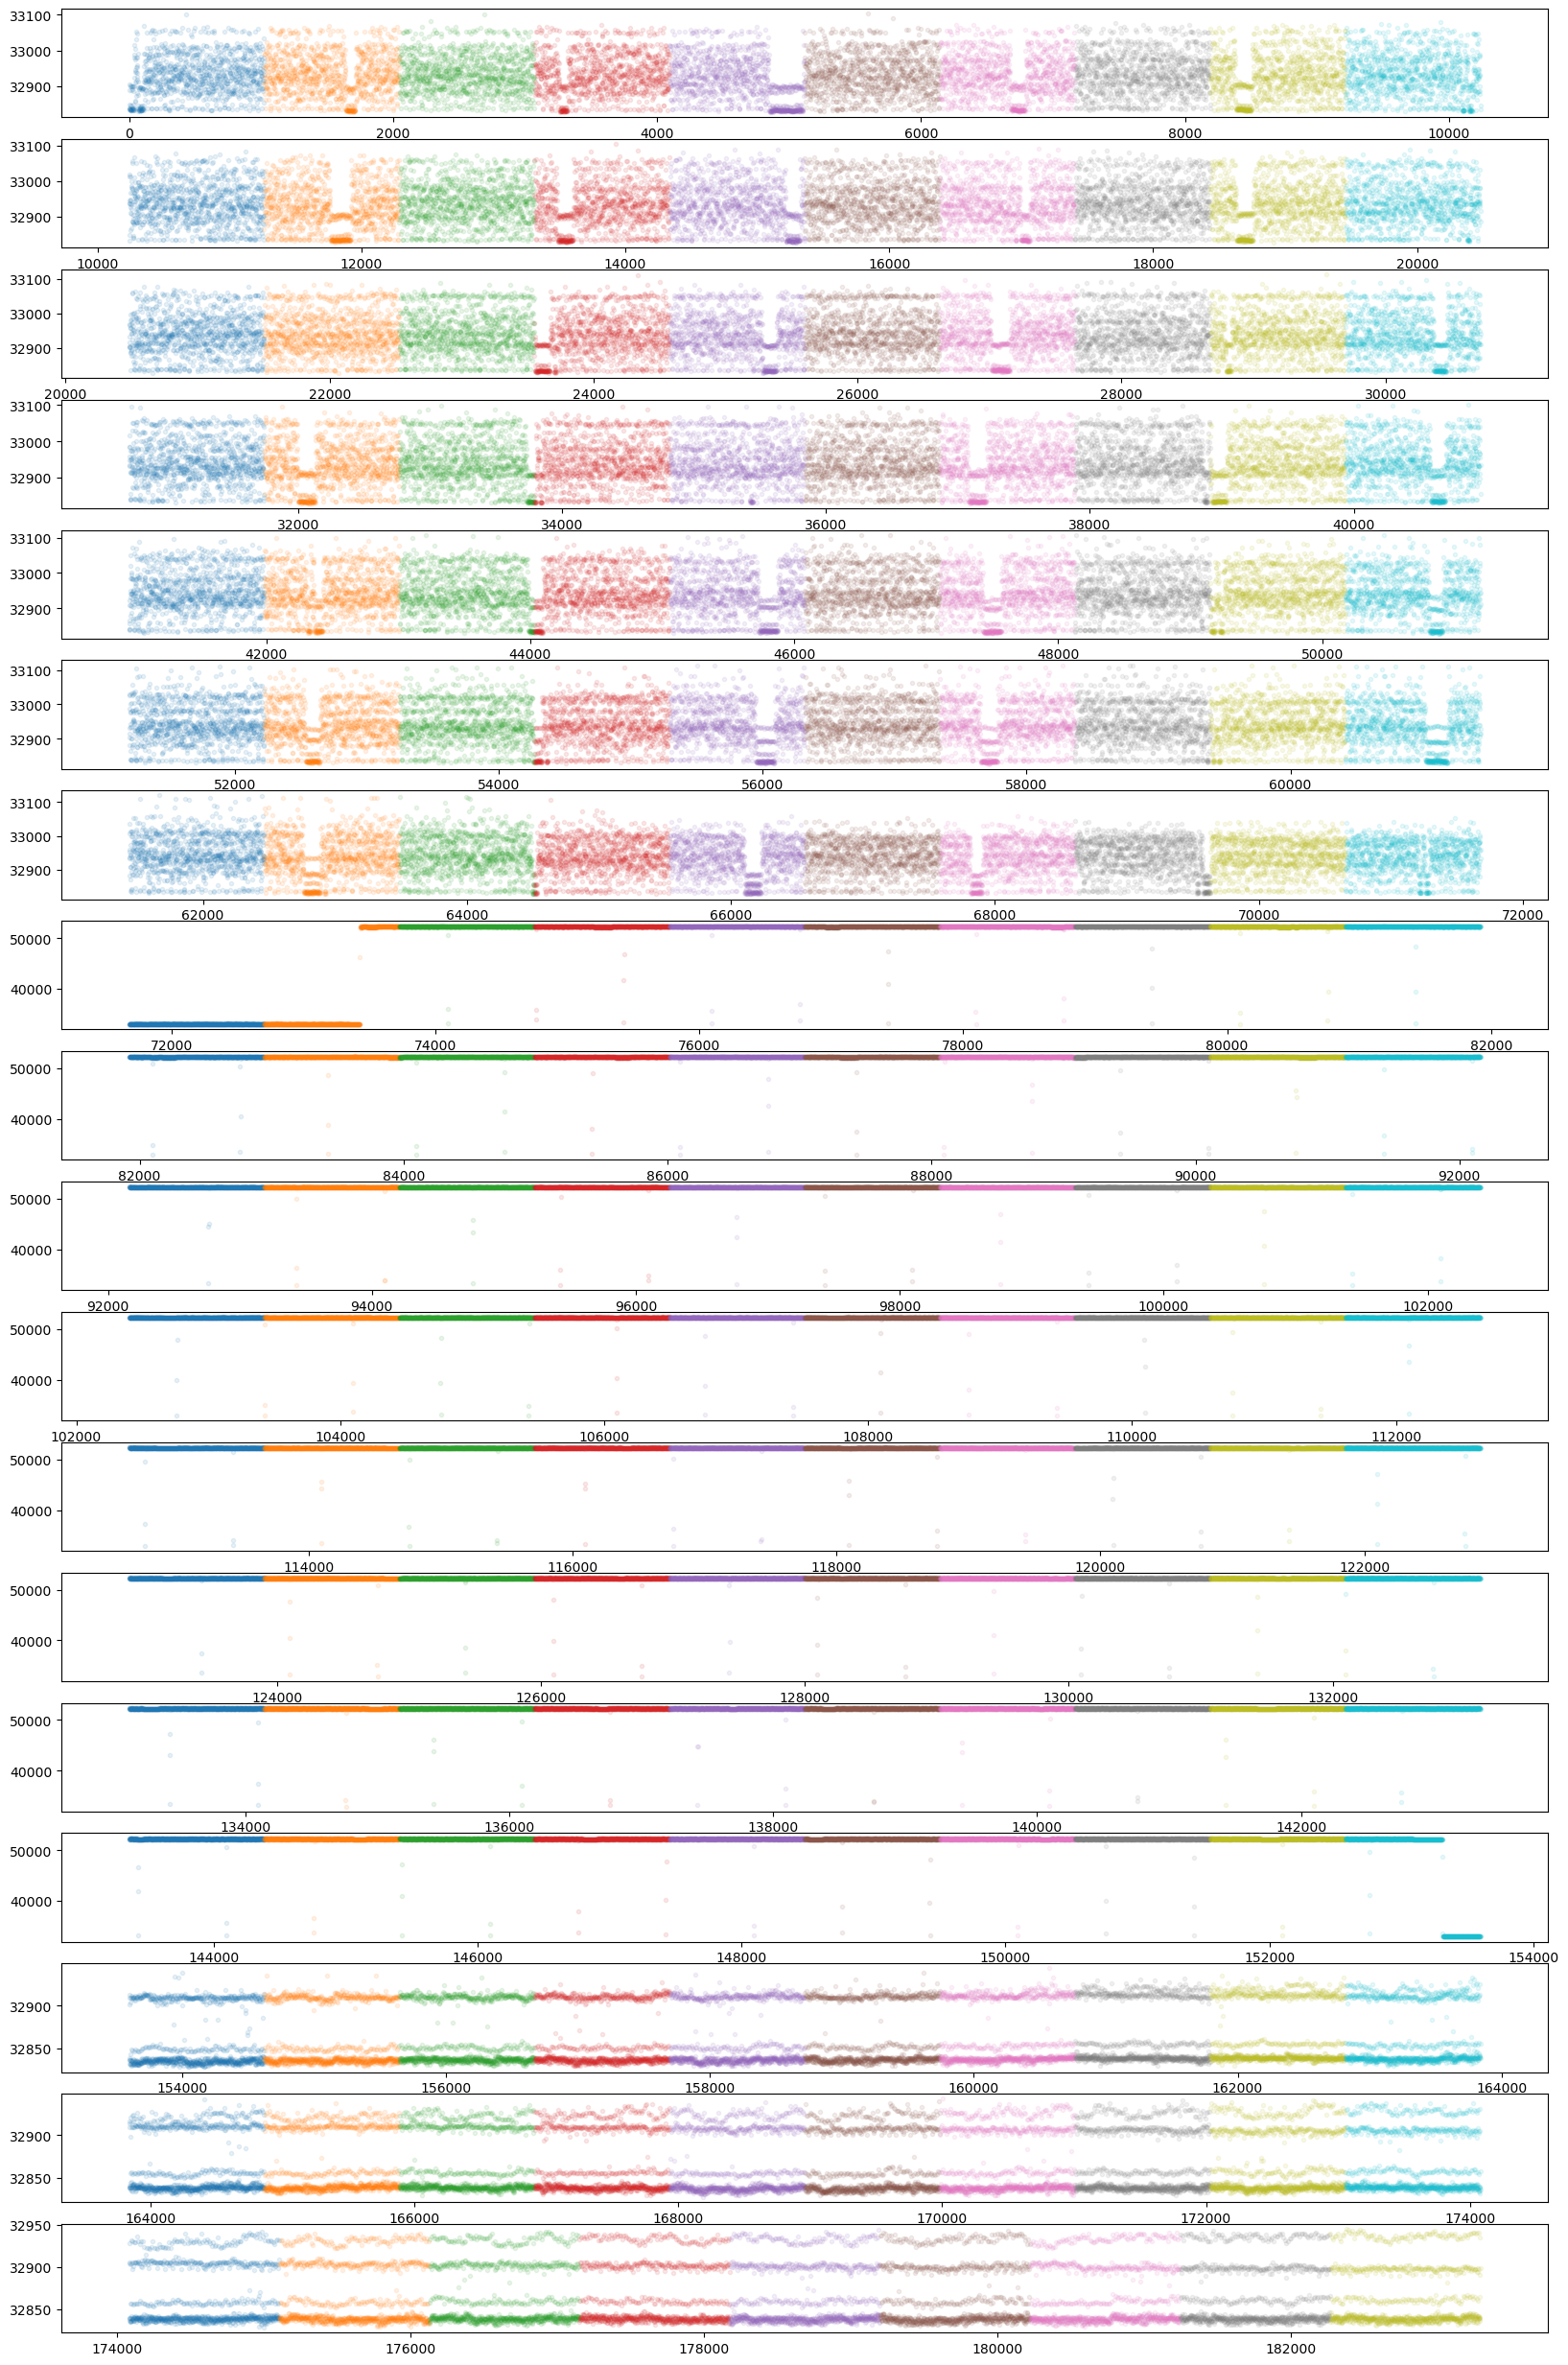

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# DOesnt work, its not even detecting a max, but it plots it..

# the aim is to count the triggers. The problemmight be that tey are sent as int16 so theya re unsigned

plt.figure(figsize=(20, 35))
n_files = 190
start_file = 11
x = np.arange(0, 1024*n_files, 1)
trigger_on_sequence = np.array([])
prev_idx = 0

just_triggered = False
w=0
for i in range(start_file, n_files):

    data = np.load(f'./saved/trg_ch_bf_{i}.npy').astype(np.int32)
    print('   ')
    print( data.max())
    start_idx = (i-start_file) * 1024
    end_idx = start_idx + 1024
    idx = (i-start_file)//10 + 1
    trigger_on_sequence = np.append(trigger_on_sequence, data)
    plt.subplot((n_files)//10 + 1, 1, idx, alpha=0.1)
    if idx != prev_idx:
        print(f'idx: {idx}, prev_idx: {prev_idx}')
        prev_idx = idx
    plt.plot( x[start_idx:end_idx], data, '.', label=f'ch_bf_{i}', alpha=0.1)

    # if idx < 7 or idx > 7:
        # continue
    # w+=1
    # if w < 3 or w > 3:
        # continue
    # count triggers in sequence
    k = 0
    n_triggers = 0

    for j in range(data.shape[0]):
        print(f'data[j]: {data[j]}')
        if data[j] > 40000:
            print(f'found trigger at {j}')
            break
        if just_triggered:
            if k >= 10:
                just_triggered = False
            k+=1
        else:
            if j < data.shape[0]-10:
                with np.errstate(over='ignore'):
                    diff = data[j+10] - data[j]
                    print(f'diff: {diff}')
                # Checking triggers like this cause if data[j+5]<data[j] then it wraps around 65536,
                # if data[j+5]-data[j] = -2 then it is actually 65536 - 2 = 65534
                '''Notice that I am also checking for a DECREASE in value since it unsigned int will make no difference '''
                if diff > 10000 :
                    # print(f'found trigger at {j}')
                    just_triggered = True
                    k+=1
                    n_triggers += 1
                else:
                    continue
    
    print(f'Number of triggers in sequence {i}: {n_triggers}')




In [28]:
data.max()

32945

(10240,)

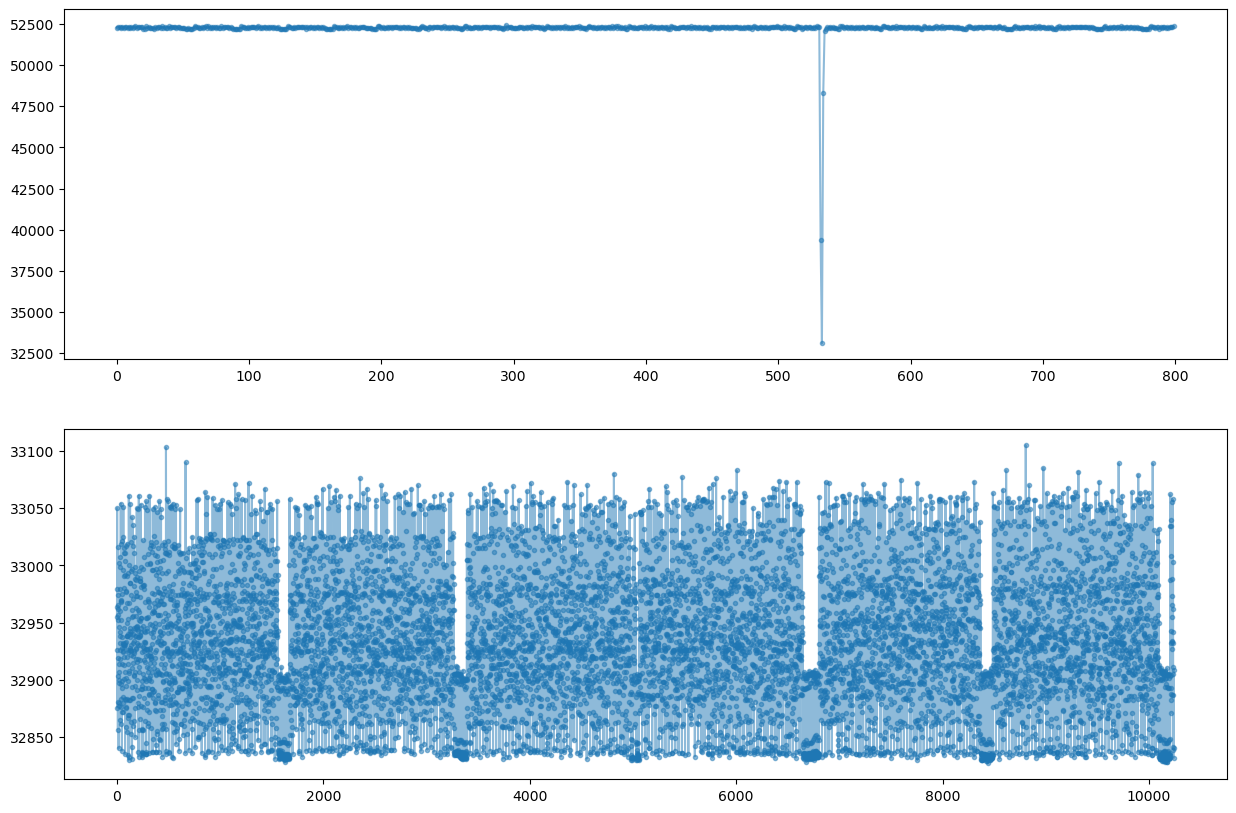

In [11]:
plt.figure(figsize=(15, 10))

n_files = 10
x = np.arange(0, 1024*n_files, 1)

trigger_on_sequence = np.array([])
for i in range(90, 90+n_files):
# for i in range(16, 16+n_files):

    data = np.load(f'./saved/trg_ch_bf_{i}.npy')
    trigger_on_sequence = np.append(trigger_on_sequence, data)
    start_idx = (i-80) * 1024
    end_idx = start_idx + 1024
    # idx = (i-11)//10 + 1

#     plt.plot( x[start_idx:end_idx], data, label=f'ch_bf_{i}')

plt.subplot(2, 1, 1)
# plt.plot(trigger_on_sequence, '.-', alpha=0.5)

plt.plot(trigger_on_sequence[0:800], '.-', alpha=0.5)
# plt.ylim(2750, 2790)


trigger_on_sequence = np.array([])
for i in range(16, 16+n_files):

    data = np.load(f'./saved/trg_ch_bf_{i}.npy')
    trigger_on_sequence = np.append(trigger_on_sequence, data)
    start_idx = (i-80) * 1024
    end_idx = start_idx + 1024
    # idx = (i-11)//10 + 1

#     plt.plot( x[start_idx:end_idx], data, label=f'ch_bf_{i}')

# plt.figure(figsize=(15, 5))
# plt.plot(trigger_on_sequence)
# plt.xlim(0, 1024)    
# plt.ylim(32500, 33500)
plt.subplot(2, 1, 2)
plt.plot(trigger_on_sequence, '.-', alpha=0.5)

trigger_on_sequence.shape

In [156]:
trigger_on_sequence

array([32848., 32835., 32905., ..., 32935., 32838., 32899.])